In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#read csv
df= pd.read_csv("abc.csv")

In [3]:
#view the data
df.head()

,IdNumber,PracticeAdd1,PracticeCity,PracticeState,PracticeZip,Birth_Year,School,Country,Degree,Gender
0,39298,,,,,1902,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Male
1,37923,14429 PETTIT WAY,POTOMAC,MD,20854,1903,"UNIV OF TEXAS MED BRANCH, GALVESTON",United States,MD,Male
2,39010,1275 DRY CREEK ROAD,HEALDSBURG,CA,95448,1904,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Female
3,38300,2904 CHAPARRAL CIRCLE,BRYAN,TX,77802,1904,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Male
4,38922,FORMOSA PLASTICS,POINT COMFORT,TX,77978,1908,"BAYLOR COLL OF MED, HOUSTON",United States,MD,Male


In [4]:
# check entries Country column
df.Country.unique()

array(['United States', 'China', 'India', ' ', 'Australia', 'Syria'],
      dtype=object)

In [7]:
# replace white space to others
df.Country = df.Country.str.strip().replace('',"others")
df.Country.unique()

array(['United States', 'China', 'India', 'others', 'Australia', 'Syria'],
      dtype=object)

#### 1. The field “Country” indicates where the physician went to medical school. Compute a new field that indicates whether a physician went to school in the U.S., or somewhere else. Whatpercentage of physicians went to school elsewhere?

In [8]:
df["US_or_not"] = np.where(df.Country == "United States", "US", "Non_US")
df.sample(20)

,IdNumber,PracticeAdd1,PracticeCity,PracticeState,PracticeZip,Birth_Year,School,Country,Degree,Gender,US_or_not
9248,68468,,,,,1950,"UNIV OF TEXAS MEDICAL SCHOOL, SAN ANTONIO",United States,MD,Male,US
7620,51320,STE 900,MONTGOMERY,AL,36117,1948,"UNIV OF TEXAS MED BRANCH, GALVESTON",United States,MD,Female,US
445,42341,"1515 HOLCOMBE BLVD, UNIT 1478",HOUSTON,TX,77030,1930,"UNIV OF OKLAHOMA COLL OF MED, OKLAHOMA CITY",United States,MD,Male,US
14105,65665,,,,,1954,"BAYLOR COLL OF MED, HOUSTON",United States,MD,Female,US
2187,48737,6624 FANNIN,HOUSTON,TX,77030,1939,"WASHINGTON UNIV MED SCH, ST LOUIS",United States,MD,Male,US
24911,427014,PINNACLE ANESTHESIA CONS,DALLAS,TX,75240,1962,"UNIV OF PITTSBURGH SCH OF MED, PITTSBURGH",United States,MD,Male,US
18126,480206,4351 E LOHMAN,LAS CRUCES,NM,88011,1957,"OHIO STATE UNIV COLL OF MED, COLUMBUS",United States,MD,Male,US
24928,402541,1626 E. COMMON,NEW BRAUNFELS,TX,78130,1962,"UNIV OF UTAH SCH OF MED, SALT LAKE CITY",United States,MD,Male,US
20769,303851,CLEAR LAKE REGIONAL MED CENTER,WEBSTER,TX,77598,1959,"TEXAS A & M UNIV HLTH SCI CTR, COLL OF MED, CO...",United States,MD,Male,US
12747,315558,MIDDLE TENN. MEDICAL CENTER,MURFREESBORO,TN,37130,1953,"UNIV OF KENTUCKY COLL OF MEDICINE, LEXINGTON",United States,MD,Male,US


In [9]:
df.US_or_not.value_counts(normalize = True)

US        0.920946
Non_US    0.079054
Name: US_or_not, dtype: float64

 7.9% went to school else where

#### 2. Of those physicians educated outside of the U.S., what percentage were trained in India? What percentage were trained in China?

In [10]:
df.Country.value_counts(normalize=True)

United States    0.920946
India            0.064742
China            0.006655
Syria            0.003889
others           0.002606
Australia        0.001163
Name: Country, dtype: float64

 6.4 % trained in India, 0.6% in China


#### 3. What is the mean age of all physicians? What is the mean age of physicians educated in the U.S.?

In [11]:
df.head()

,IdNumber,PracticeAdd1,PracticeCity,PracticeState,PracticeZip,Birth_Year,School,Country,Degree,Gender,US_or_not
0,39298,,,,,1902,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Male,US
1,37923,14429 PETTIT WAY,POTOMAC,MD,20854,1903,"UNIV OF TEXAS MED BRANCH, GALVESTON",United States,MD,Male,US
2,39010,1275 DRY CREEK ROAD,HEALDSBURG,CA,95448,1904,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Female,US
3,38300,2904 CHAPARRAL CIRCLE,BRYAN,TX,77802,1904,"UNIV OF TEXAS, SOUTHWESTERN MED SCH, DALLAS",United States,MD,Male,US
4,38922,FORMOSA PLASTICS,POINT COMFORT,TX,77978,1908,"BAYLOR COLL OF MED, HOUSTON",United States,MD,Male,US


In [12]:
(datetime.now().year - df.Birth_Year).mean()

71.67468430547204

the mean age of all physicians is 71.67 years

In [13]:
(datetime.now().year- (df[df.Country == "United States"].Birth_Year)).mean()

71.72802855526052

the mean age of physicians educated in the US is 71.72

#### 4. Create a chart comparing mean age by country of medical education.

In [14]:
df["age"] = datetime.now().year - df.Birth_Year

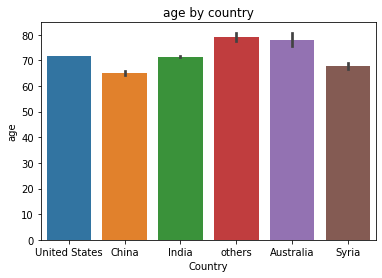

In [15]:
sns.barplot(x = df.Country, y = df.age)
plt.title("age by country")
plt.show()

#### 5. Based on the data in the file you were given, write a paragraph describing how country of education and age may be related.

In [28]:
df.groupby("Country").agg({"age": [np.mean, 'min', 'max', "median"]})


age                
                    mean min  max median
Country                                 
Australia      78.068966  62   94   78.0
China          64.921687  61   99   63.0
India          71.433437  61   97   71.0
Syria          67.701031  61   83   67.0
United States  71.728029  61  121   70.0
others         79.138462  61   95   78.0

China seems to be producing youngest on average physician followed by Syria. Australia has the oldest ones on 
average followed by the US.
Minimum age begains with 61 for all countries except Australia which is 62. 
United states has the oldest physican of 121 years old
That seems odd, needs data verification. Oldest physican who studied in China 99 years. 
Median age for US is 70, Syria is 67, India 71, China 63, and Australia 78

----end of time allowed---